# Mini Project 1


### Spotify Playlist Analysis

Spotify is one of the most popular audio streaming and media services provider, founded in 2006.

I will look at the Spotify playlist with the **Top 500 most streamed songs on spotify**. Using information about the tracks, artists and the track audio features, goal is to better understand what are some of the factors that influence songs to be popular.

Similar analysis could help those in the music industry to understand trends in popular music and incorporate into their strategy for creating music.

### Assumptions

- The playlist has the correct top 500
- In order of most streamed to least streamed


In [2]:
import json
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection & Wrangling

Through Spotify API, I will retrieve information about tracks, artists and audio features for each track in the playlist. 

Firstly set up the client with the authentication details.

In [4]:
file = 'auth_spotify.json'
auth = json.loads(open(file).read())

In [5]:
auth.keys()

dict_keys(['client_id', 'client_secret'])

In [6]:
# set up client with auth
client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=auth['client_id'], client_secret=auth['client_secret'])
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

<br>   
Specify URL of the playlist to get URI.

In [7]:
# Playlist of top 500 most streamed songs
playlist_link = 'https://open.spotify.com/playlist/3RWRqUa3ghwX7ZeXWOReYn?si=f7b5042506f3481d'

# strip URI
playlist_uri = playlist_link.split('/')[-1].split('?')[0]

<br>
Retrieve tracks in the playlist using URI.

In [8]:
playlist = sp.playlist_tracks(playlist_uri)

Response contains 'items', which is a list of dictionaries, each dictionary corresponding to a track.

In [9]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/3RWRqUa3ghwX7ZeXWOReYn/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2022-04-05T01:51:41Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/dariuscrowd'},
    'href': 'https://api.spotify.com/v1/users/dariuscrowd',
    'id': 'dariuscrowd',
    'type': 'user',
    'uri': 'spotify:user:dariuscrowd'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
       'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
       'id': '6eUKZXaKkcviH0Ku9w2n3V',
       'name': 'Ed Sheeran',
       'type': 'artist',
       'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
   

In [10]:
# Check how many tracks are in the response
len(playlist['items'])

100

Note that only 100 tracks were retrieved, due to the API retrieval limit of 100.     
Use loop to make multiple API calls to get all tracks.

In [11]:
results = sp.playlist_tracks(playlist_uri)

# initialise list with first 100 results in playlist
playlist = results['items']

# playlist['next'] field indicates whether there is a next page of results
# sp.next() retrieves those songs in the next page
while results['next']:
    
    # Debug - print playlist['next'] to check iterations
    # print(results['next'])
    
    # get next page of tracks
    results = sp.next(results)
    
    # add results to list
    playlist.extend(results['items'])

Now I should have all tracks in the playlist.

In [12]:
len(playlist)

509

In [13]:
playlist[0]

{'added_at': '2022-04-05T01:51:41Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/dariuscrowd'},
  'href': 'https://api.spotify.com/v1/users/dariuscrowd',
  'id': 'dariuscrowd',
  'type': 'user',
  'uri': 'spotify:user:dariuscrowd'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
     'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
     'id': '6eUKZXaKkcviH0Ku9w2n3V',
     'name': 'Ed Sheeran',
     'type': 'artist',
     'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH

For every track in playlist, I want to get the following data.

- ID
- Name
- Popularity
- Album
- Release Date
- Duration
- Explicit
- Artist name

Additional data (retrieved via other APIs).
- Artist popularity
- Artist genres
- Audio features


Audio features API provides interesting audio metrics of a track. These will be analysed later.   

e.g.


In [14]:
sp.audio_features('spotify:track:0FE9t6xYkqWXU2ahLh6D8X')

[{'danceability': 0.825,
  'energy': 0.652,
  'key': 1,
  'loudness': -3.183,
  'mode': 0,
  'speechiness': 0.0802,
  'acousticness': 0.581,
  'instrumentalness': 0,
  'liveness': 0.0931,
  'valence': 0.931,
  'tempo': 95.977,
  'type': 'audio_features',
  'id': '0FE9t6xYkqWXU2ahLh6D8X',
  'uri': 'spotify:track:0FE9t6xYkqWXU2ahLh6D8X',
  'track_href': 'https://api.spotify.com/v1/tracks/0FE9t6xYkqWXU2ahLh6D8X',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0FE9t6xYkqWXU2ahLh6D8X',
  'duration_ms': 233713,
  'time_signature': 4}]

Following function takes the raw response data and flesh out the fields I need.    
This also **enriches** the output by getting additional data from artist and audio feature APIs.

Input - Dictionary, raw data of a track    
Output - Dictionary, formatted data of the input track 

In [15]:
def enrich_track(item: dict):
    
    # call artist API to get additional artist info
    artist = sp.artist(item["track"]["artists"][0]["uri"])
    
    # track and artist data
    track = {
        "track_id": item["track"]["id"],
        "track_name": item["track"]["name"],
        "track_pop": item["track"]["popularity"],
        "album": item["track"]["album"]["name"],
        "release_date": item["track"]["album"]["release_date"],
        "duration": item["track"]["duration_ms"],
        "explicit": item["track"]["explicit"],
        "artist_name": item["track"]["artists"][0]["name"],
        "artist_pop": artist["popularity"],
        "artist_genres": artist["genres"]
    }
    
    # call audio features API to get audio analysis of track
    audio = sp.audio_features(item["track"]["uri"])[0]
    
    # update track with audio features data
    track.update(audio)
    
    # return the complete track data as dictionary
    return track


Now call the enrich_track function on every track in playlist, appending them into a single list. 


In [16]:
# enrich every song in the playlist
# save as a list of dictionaries - to easily convert to dataframe later
tracks = [enrich_track(song) for song in playlist]

In [17]:
tracks

[{'track_id': '0FE9t6xYkqWXU2ahLh6D8X',
  'track_name': 'Shape of You',
  'track_pop': 67,
  'album': 'Shape of You',
  'release_date': '2017-01-06',
  'duration': 233712,
  'explicit': False,
  'artist_name': 'Ed Sheeran',
  'artist_pop': 89,
  'artist_genres': ['pop', 'uk pop'],
  'danceability': 0.825,
  'energy': 0.652,
  'key': 1,
  'loudness': -3.183,
  'mode': 0,
  'speechiness': 0.0802,
  'acousticness': 0.581,
  'instrumentalness': 0,
  'liveness': 0.0931,
  'valence': 0.931,
  'tempo': 95.977,
  'type': 'audio_features',
  'id': '0FE9t6xYkqWXU2ahLh6D8X',
  'uri': 'spotify:track:0FE9t6xYkqWXU2ahLh6D8X',
  'track_href': 'https://api.spotify.com/v1/tracks/0FE9t6xYkqWXU2ahLh6D8X',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0FE9t6xYkqWXU2ahLh6D8X',
  'duration_ms': 233713,
  'time_signature': 4},
 {'track_id': '0sf12qNH5qcw8qpgymFOqD',
  'track_name': 'Blinding Lights',
  'track_pop': 17,
  'album': 'Blinding Lights',
  'release_date': '2019-11-29',
  'duration':

In [18]:
# check length of tracks - should be 509
len(tracks)

509

This is now ready to be converted into a dataframe.

In [19]:
df = pd.DataFrame(tracks)

<h2>Data Manipulation & Formatting

Now I have an initial dataframe, but further manipulation and formatting needs to take place to get data ready for analysis.

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df.head(10)

track_id                                     track_name  \
0  0FE9t6xYkqWXU2ahLh6D8X                                   Shape of You   
1  0sf12qNH5qcw8qpgymFOqD                                Blinding Lights   
2  1rgnBhdG2JDFTbYkYRZAku                                   Dance Monkey   
3  1OmcAT5Y8eg5bUPv9qJT4R                                       rockstar   
4  7qEHsqek33rTcFNT9PFqLf                              Someone You Loved   
5  1A6OTy97kk0mMdm78rHsm8  Sunflower - Spider-Man: Into the Spider-Verse   
6  0JoaFxLgrqbWutREzcZBzS                                      One Dance   
7  7BKLCZ1jbUBVqRi2FVlTVw                                         Closer   
8  6VRghJeP6I0w1KxkdWFfIh                                       Believer   
9  0TK2YIli7K1leLovkQiNik                                       Señorita   

   track_pop                                          album release_date  \
0         67                                   Shape of You   2017-01-06   
1         17                                Blinding Lights   2019-11-29   
2         63                                   Dance Monkey   2019-05-10   
3          0                                       rockstar   2017-09-15   
4         87        Divinely Uninspired To A Hellish Extent   2019-05-17   
5          0  Sunflower (Spider-Man: Into the Spider-Verse)   2018-10-18   
6          0                                      One Dance   2016-04-05   
7         84                                         Closer   2016-07-29   
8          0                                       Believer   2017-01-31   
9         79                                       Señorita   2019-06-21   

   duration  explicit       artist_name  artist_pop  \
0    233712     False        Ed Sheeran          89   
1    201573     False        The Weeknd          93   
2    209754     False       Tones And I          70   
3    218320      True       Post Malone          87   
4    182160     False     Lewis Capaldi          80   
5    158053     False       Post Malone          87   
6    173974     False             Drake          97   
7    244960     False  The Chainsmokers          79   
8    203782     False   Imagine Dragons          87   
9    190960     False      Shawn Mendes          83   

                                       artist_genres  danceability  energy  \
0                                      [pop, uk pop]         0.825   0.652   
1     [canadian contemporary r&b, canadian pop, pop]         0.513   0.796   
2                              [australian pop, pop]         0.826   0.593   
3                        [dfw rap, melodic rap, rap]         0.580   0.531   
4                                      [pop, uk pop]         0.501   0.405   
5                        [dfw rap, melodic rap, rap]         0.753   0.498   
6  [canadian hip hop, canadian pop, hip hop, rap,...         0.771   0.629   
7  [dance pop, edm, electropop, pop, pop dance, t...         0.748   0.524   
8                                [modern rock, rock]         0.770   0.787   
9          [canadian pop, dance pop, pop, viral pop]         0.759   0.540   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    1    -3.183     0       0.0802       0.58100          0.000000    0.0931   
1    1    -4.075     1       0.0629       0.00147          0.000209    0.0938   
2    6    -6.401     0       0.0976       0.68800          0.000161    0.1700   
3    5    -6.631     0       0.0776       0.12800          0.000127    0.1430   
4    1    -5.679     1       0.0319       0.75100          0.000000    0.1050   
5    2    -5.610     1       0.0504       0.55100          0.000000    0.0706   
6    1    -5.790     1       0.0511       0.00802          0.002520    0.3560   
7    8    -5.599     1       0.0338       0.41400          0.000000    0.1110   
8   10    -4.402     0       0.1130       0.04820          0.000000    0.1080   
9    9    -6.039     0       0.0287       0.03700          0.000000 

In [22]:
df.shape

(509, 28)

There are 509 rows, 28 columns in the dataframe.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          509 non-null    object 
 1   track_name        509 non-null    object 
 2   track_pop         509 non-null    int64  
 3   album             509 non-null    object 
 4   release_date      509 non-null    object 
 5   duration          509 non-null    int64  
 6   explicit          509 non-null    bool   
 7   artist_name       509 non-null    object 
 8   artist_pop        509 non-null    int64  
 9   artist_genres     509 non-null    object 
 10  danceability      509 non-null    float64
 11  energy            509 non-null    float64
 12  key               509 non-null    int64  
 13  loudness          509 non-null    float64
 14  mode              509 non-null    int64  
 15  speechiness       509 non-null    float64
 16  acousticness      509 non-null    float64
 1

Dataset contains no nulls. Release_date is an object which could be converted to datetime.

### From looking at the first few rows
- Some columns can be dropped (e.g. identifiers) as they won't be used for analysis.

### Columns to be modified
- **release_date** - convert to datetime
- **duration** - convert from milliseconds to seconds
- **tempo** - round up
- **key** - map to pitch class notation
- **mode** - map to major/minor
- **Audio metrics** - Mostly arbitrary floats, normalised between 0-1.

### New columns to be added
- **year** - year component of release_date
- **key_mode** - combination of key and mode

Drop following columns as they are either identifiers, contain a single value or duplicated columns

In [24]:
df.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'id'], axis=1, inplace=True)

In [25]:
df.shape

(509, 22)

#### Release Date
Convert release date column to datetime.

Also create a new column 'year' for release year.

In [26]:
df['release_date'] =  pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

#### Duration
Duration of the song in milliseconds. Convert to seconds and round up to whole number.

In [27]:
df['duration'] = round(df['duration']/1000)

#### Tempo
This is the bpm of the track. Round up to whole number

In [28]:
df['tempo'] = round(df['tempo'])

#### Key
Key is an integer that maps to [pitch class notation](https://en.wikipedia.org/wiki/Pitch_class) (Source - Spotify API Documentation)

e.g. 0 = C, 1 = C#/Db, 2 = D ...

Map the integer to the corresponding key.

In [29]:
pitch_class = {0: "C", 1: "C#/Db", 2: "D", 3: "D#/Eb", 4: "E", 5: "F", 6: "F#/Gb",
               7: "G", 8: "G#/Ab", 9: "A", 10: "A#/Bb", 11: "B"}

df['key'] = df['key'].map(pitch_class)

#### Mode
This is an integer indicating the modality (major or minor) of a track. Major is represented by 1 and minor is 0.  

Map integers to corresponding mode.

In [30]:
mode = {0: 'Minor', 1: 'Major'}

df['mode'] = df['mode'].map(mode)

#### Key_Mode
True key of a track is described by both its key and mode (e.g. C Major).

Create a new column by combining Key and Mode

In [31]:
df['key_mode'] = df[['key', 'mode']].agg(' '.join, axis=1)

#### Audio features

Following audio columns have been normalised by spotify to be between 0-1.
- **Danceability** - suitability for dancing
- **Energy** - measure of intensity and activity
- **Speechiness** - presence of spoken words in a track
- **Acousticness** - confidence measure of whether the track is acoustic
- **Instrumentalness** - whether a track contains no vocals
- **Liveness** - presence of an audience in the recording
- **Valence** - musical positiveness conveyed by a track

Multiply by 100 and round up to get a score-like metric (out of 100)

In [32]:
normalised_columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

df[normalised_columns] = round(df[normalised_columns]*100)

<br>
Check head to see the formatted data. It should now be ready for analysis.

This is the top 10 most streamed songs on the playlist.

In [33]:
df.head(10)

track_id                                     track_name  \
0  0FE9t6xYkqWXU2ahLh6D8X                                   Shape of You   
1  0sf12qNH5qcw8qpgymFOqD                                Blinding Lights   
2  1rgnBhdG2JDFTbYkYRZAku                                   Dance Monkey   
3  1OmcAT5Y8eg5bUPv9qJT4R                                       rockstar   
4  7qEHsqek33rTcFNT9PFqLf                              Someone You Loved   
5  1A6OTy97kk0mMdm78rHsm8  Sunflower - Spider-Man: Into the Spider-Verse   
6  0JoaFxLgrqbWutREzcZBzS                                      One Dance   
7  7BKLCZ1jbUBVqRi2FVlTVw                                         Closer   
8  6VRghJeP6I0w1KxkdWFfIh                                       Believer   
9  0TK2YIli7K1leLovkQiNik                                       Señorita   

   track_pop                                          album release_date  \
0         67                                   Shape of You   2017-01-06   
1         17                                Blinding Lights   2019-11-29   
2         63                                   Dance Monkey   2019-05-10   
3          0                                       rockstar   2017-09-15   
4         87        Divinely Uninspired To A Hellish Extent   2019-05-17   
5          0  Sunflower (Spider-Man: Into the Spider-Verse)   2018-10-18   
6          0                                      One Dance   2016-04-05   
7         84                                         Closer   2016-07-29   
8          0                                       Believer   2017-01-31   
9         79                                       Señorita   2019-06-21   

   duration  explicit       artist_name  artist_pop  \
0     234.0     False        Ed Sheeran          89   
1     202.0     False        The Weeknd          93   
2     210.0     False       Tones And I          70   
3     218.0      True       Post Malone          87   
4     182.0     False     Lewis Capaldi          80   
5     158.0     False       Post Malone          87   
6     174.0     False             Drake          97   
7     245.0     False  The Chainsmokers          79   
8     204.0     False   Imagine Dragons          87   
9     191.0     False      Shawn Mendes          83   

                                       artist_genres  danceability  energy  \
0                                      [pop, uk pop]          82.0    65.0   
1     [canadian contemporary r&b, canadian pop, pop]          51.0    80.0   
2                              [australian pop, pop]          83.0    59.0   
3                        [dfw rap, melodic rap, rap]          58.0    53.0   
4                                      [pop, uk pop]          50.0    40.0   
5                        [dfw rap, melodic rap, rap]          75.0    50.0   
6  [canadian hip hop, canadian pop, hip hop, rap,...          77.0    63.0   
7  [dance pop, edm, electropop, pop, pop dance, t...          75.0    52.0   
8                                [modern rock, rock]          77.0    79.0   
9          [canadian pop, dance pop, pop, viral pop]          76.0    54.0   

     key  loudness   mode  speechiness  acousticness  instrumentalness  \
0  C#/Db    -3.183  Minor          8.0          58.0               0.0   
1  C#/Db    -4.075  Major          6.0           0.0               0.0   
2  F#/Gb    -6.401  Minor         10.0          69.0               0.0   
3      F    -6.631  Minor          8.0          13.0               0.0   
4  C#/Db    -5.679  Major          3.0          75.0               0.0   
5      D    -5.610  Major          5.0          55.0               0.0   
6  C#/Db    -5.790  Major          5.0           1.0               0.0   
7  G#/Ab    -5.599  Major          3.0          41.0               0.0   
8  A#/Bb    -4.402  Minor         11.0           5.0               0.0   
9      A    -6.039  Minor          3.0           4.0               0.0   

   liveness  valence  tempo  time_signature  year     key_mode 

## Exploratory Data Analysis 

Firstly, look at the summary statistics of the numeric columns.

In [34]:
df.describe().astype(int)

track_pop  duration  artist_pop  danceability  energy  loudness  \
count        509       509         509           509     509       509   
mean          66       218          80            67      64        -6   
std           26        43           8            13      17         2   
min            0        95          55            19       5       -20   
25%           71       193          75            58      53        -7   
50%           78       214          82            69      66        -5   
75%           81       241          87            76      77        -4   
max           95       418         100            95      97        -2   

       speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
count          509           509               509       509      509    509   
mean             9            21                 0        16       49    119   
std              8            24                 4        13       22     26   
min              2             0                 0         2        6     59   
25%              4             3                 0         9       34    100   
50%              6            12                 0        12       49    119   
75%             10            30                 0        19       67    136   
max             49            98                66        80       98    206   

       time_signature  year  
count             509   509  
mean                3  2013  
std                 0    10  
min                 1  1967  
25%                 4  2013  
50%                 4  2017  
75%                 4  2018  
max                 5  2022

In [35]:
# Average duration in minutes
avg_duration = divmod(round(df['duration'].mean()), 60)
print(f'Average duration: {avg_duration[0]} minutes {avg_duration[1]} seconds')

Average duration: 3 minutes 39 seconds


### Initial findings
- Track popularity ranges from 0 to 95, artist popularity from 55 to 100
- Average track duration is 3 minutes 39 seconds
- Average danceability, energy is high (>50)
- Speechiness is low (>66 = audiobooks, 33~66 = rap, <33 = music)
- Acoustic & liveness low
- Valence is around the halfway mark.
- Average tempo is 119 bpm (e.g. uptown funk, billie jean)
- Tracks from 1967 to 2022 (55 years). 

Check the summary statistics of the non-numeric columns.

In [36]:
df.describe(include='object')

track_id  track_name            album artist_name  \
count                      509         509              509         509   
unique                     509         505              451         271   
top     0FE9t6xYkqWXU2ahLh6D8X  Without Me  Stoney (Deluxe)  Ed Sheeran   
freq                         1           2                4          13   

           artist_genres    key   mode     key_mode  
count                509    509    509          509  
unique               232     12      2           24  
top     [dance pop, pop]  C#/Db  Major  C#/Db Major  
freq                  30     66    292           42

### Initial findings
- Top artist is Ed Sheeran
- Top album is Stoney (Post Malone)
- Top artist genre combination is [dance pop, pop]
- Most frequent key is C#/Db
- Just over half of the songs are in major mode

## Analysis by Artist

##### How many unique artists are there in the top 500?

In [37]:
df['artist_name'].nunique()

271

##### Who are the top artists?

So I know Ed Sheeran is the top artist, but who else is there and how many songs do they have?

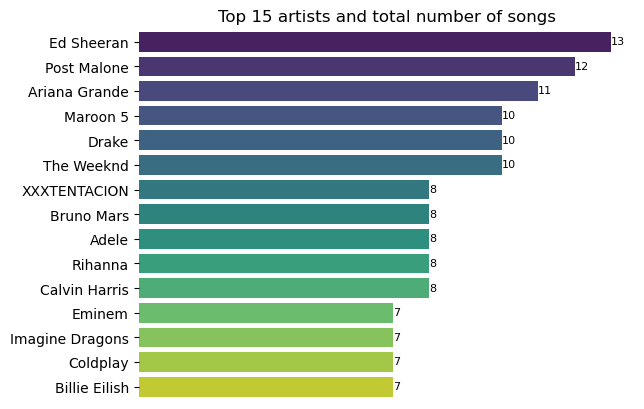

In [39]:
top_15_artists = df['artist_name'].value_counts().nlargest(15)

ax = sns.barplot(y=top_15_artists.index, x=top_15_artists, palette='viridis')
ax.set(xlabel='Number of songs', title='Top 15 artists and total number of songs')
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)
for artist_index, count in enumerate(top_15_artists):
    ax.text(x=count, y=artist_index + 0.1, s=count, color='black', fontsize=8)
plt.show()

<br>
Ed Sheeran has the most streamed songs, at 13 songs total.

Followed by Post malone (12), Ariana Grande (11), Maroon 5/Drake/The Weeknd (10)

##### What percentage share of total songs do the artists have?

If I sorted the artists into bins based on the total number of songs they have in the playlist, what share of the total songs will each group have?

In [40]:
df_artist = df['artist_name'].value_counts().reset_index(name='count')
df_artist.rename(columns={'index': 'artist_name'}, inplace=True)

Create 4 bins and sort artists into the following groups
- 1-3 songs
- 4-6 songs
- 7-9 songs
- 10-13 songs

In [41]:
df_artist['bin'] = pd.cut(df_artist['count'], bins=4, right=False, labels=['1-3', '4-6', '7-9', '10-13'])

<br>
Calculate the percentage of artists that fall into each bin.

In [42]:
pct_artists = df_artist.groupby('bin')['artist_name'].count()/len(df_artist)*100

In [43]:
pct_artists

bin
1-3      88.560886
4-6       5.904059
7-9       3.321033
10-13     2.214022
Name: artist_name, dtype: float64

<br>
Calculate the cumulative percentage of the artists in each bin.

In [44]:
pct_artists.sort_values(ascending=True, inplace=True)
pct_artists_cs = np.cumsum(pct_artists)
pct_artists_cs.values

array([  2.21402214,   5.53505535,  11.43911439, 100.        ])

<br>
Calculate the cumulative percentage of the songs by each bin.

In [45]:
pct_songs = df_artist.groupby('bin')['count'].sum()/len(df)*100

In [46]:
pct_songs

bin
1-3      58.939096
4-6      14.734774
7-9      13.359528
10-13    12.966601
Name: count, dtype: float64

In [47]:
pct_songs.sort_values(ascending=True, inplace=True)
pct_songs_cs = np.cumsum(pct_songs)
pct_songs_cs.values

array([ 12.96660118,  26.32612967,  41.06090373, 100.        ])

Plot this on a 100% stacked chart, to show relative percentage of the artists in each bin and their relative share of songs in the top 500 playlist

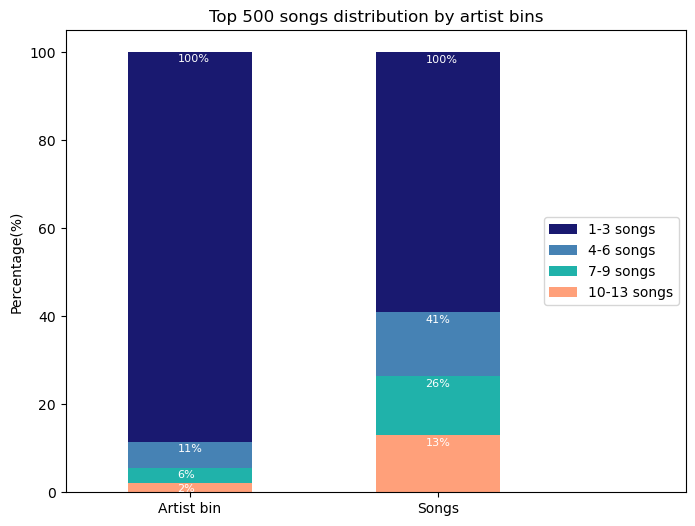

In [48]:
xvalues = ['Artist bin', 'Songs']
colours = ['lightsalmon', 'lightseagreen', 'steelblue', 'midnightblue']
bins = df_artist['bin'].unique()

plt.figure(figsize=(8,6))
for i in reversed(range(len(pct_songs_cs.values))):
    plt.bar(x=xvalues, height=[pct_artists_cs.values[i], pct_songs_cs.values[i]], color=colours[i], width=0.5, label=f'{bins[i]} songs')
    plt.annotate(f'{round(pct_artists_cs.values[i])}%', xy=(-0.05, pct_artists_cs.values[i]-2.2), color='white', size=8)
    plt.annotate(f'{round(pct_songs_cs.values[i])}%', xy=(0.95, pct_songs_cs.values[i]-2.5), color='white', size=8)

plt.title('Top 500 songs distribution by artist bins')
plt.ylabel('Percentage(%)')
plt.legend(loc='center right')
plt.xlim([-0.5,2])
plt.show()

Majority of artists only have 1-3 songs (89%) in the top 500.   
But a small percentage of them have 4 or more songs (11%):
- 6% have 4-6 songs
- 3% have 7-9 songs
- 2% have 10-13 songs

However this relatively small group of artists (> 4 songs) make up **41%** of the total songs in the playlist.

## Analysis by Artist Genres

Each artist has their own musical style (genre) which usually spans across multiple genres.

##### What are the most frequent artist genres?

In [49]:
df[['artist_name', 'artist_genres']].head(10)

artist_name                                      artist_genres
0        Ed Sheeran                                      [pop, uk pop]
1        The Weeknd     [canadian contemporary r&b, canadian pop, pop]
2       Tones And I                              [australian pop, pop]
3       Post Malone                        [dfw rap, melodic rap, rap]
4     Lewis Capaldi                                      [pop, uk pop]
5       Post Malone                        [dfw rap, melodic rap, rap]
6             Drake  [canadian hip hop, canadian pop, hip hop, rap,...
7  The Chainsmokers  [dance pop, edm, electropop, pop, pop dance, t...
8   Imagine Dragons                                [modern rock, rock]
9      Shawn Mendes          [canadian pop, dance pop, pop, viral pop]

There are some issues here:
- artist_genres column contains lists of varying lengths
- If the artist appears multiple times, their genres will be duplicated

First check how many unique artist genres there are.

In [50]:
artist_genres = [genre for genre_list in df['artist_genres'] for genre in genre_list]
len(set(artist_genres))

224

By using 'explode', create a row for each genre in the list.

In [51]:
df.explode('artist_genres')

track_id             track_name  track_pop  \
0    0FE9t6xYkqWXU2ahLh6D8X           Shape of You         67   
0    0FE9t6xYkqWXU2ahLh6D8X           Shape of You         67   
1    0sf12qNH5qcw8qpgymFOqD        Blinding Lights         17   
1    0sf12qNH5qcw8qpgymFOqD        Blinding Lights         17   
1    0sf12qNH5qcw8qpgymFOqD        Blinding Lights         17   
..                      ...                    ...        ...   
505  0bVtevEgtDIeRjCJbK3Lmv  Welcome To The Jungle         79   
506  6I3mqTwhRpn34SLVafSH7G                  Ghost         86   
506  6I3mqTwhRpn34SLVafSH7G                  Ghost         86   
507  4fouWK6XVHhzl78KzQ1UjL                abcdefu         84   
508  1Xi84slp6FryDSCbzq4UCD                 Arcade         79   

                        album release_date  duration  explicit  \
0                Shape of You   2017-01-06     234.0     False   
0                Shape of You   2017-01-06     234.0     False   
1             Blinding Lights   2019-11-29     202.0     False   
1             Blinding Lights   2019-11-29     202.0     False   
1             Blinding Lights   2019-11-29     202.0     False   
..                        ...          ...       ...       ...   
505  Appetite For Destruction   1987-07-21     272.0      True   
506                   Justice   2021-03-19     153.0     False   
506                   Justice   2021-03-19     153.0     False   
507                   abcdefu   2021-08-13     169.0      True   
508                    Arcade   2019-03-07     184.0     False   

         artist_name  artist_pop              artist_genres  danceability  \
0         Ed Sheeran          89                        pop          82.0   
0         Ed Sheeran          89                     uk pop          82.0   
1         The Weeknd          93  canadian contemporary r&b          51.0   
1         The Weeknd          93               canadian pop          51.0   
1         The Weeknd          93                        pop          51.0   
..               ...         ...                        ...           ...   
505    Guns N' Roses          79                       rock          45.0   
506    Justin Bieber          89               canadian pop          60.0   
506    Justin Bieber          89                        pop          60.0   
507            GAYLE          69     modern alternative pop          70.0   
508  Duncan Laurence          68                  dutch pop          45.0   

     energy    key  loudness   mode  speechiness  acousticness  \
0      65.0  C#/Db    -3.183  Minor          8.0          58.0   
0      65.0  C#/Db    -3.183  Minor          8.0          58.0   
1      80.0  C#/Db    -4.075  Major          6.0           0.0   
1      80.0  C#/Db    -4.075  Major          6.0           0.0   
1      80.0  C#/Db    -4.075  Major          6.0           0.0   
..      ...    ...       ...    ...          ...           ...   
505    95.0  G#/Ab    -8.069  Major          8.0           2.0   
506    74.0      D    -5.569  Major          5.0          18.0   
506    74.0      D    -5.569  Major          5.0          18.0   
507    54.0      E    -5.692  Major          5.0          30.0   
508    33.0      A   -12.603  Minor          4.0          82.0   

     instrumentalness  liveness  valence  tempo  time_signature  year  \
0                 0.0       9.0     93.0   96.0               4  2017   
0                 0.0       9.0     93.0   96.0               4  2017   
1                 0.0       9.0     34.0  171.0               4  2019   
1                 0.0       9.0     34.0  171.0               4  2019   
1                 0.0       9.0     34.0  171.0               4  2019   
..                ...       ...      ...    ...             ...   ...   
505              40.0      30.0     33.0  123.0               4  1987   
506               0.0      42.0     44.0  154.0               4  2021   
506               0.0      42.0     44.0  154.0               4  2021 

Subset the artist name and artist genres columns. Then drop duplicates to ensure each artist's genres appear only once.

In [52]:
genres_dupe_removed = df.explode('artist_genres')[['artist_name', 'artist_genres']].drop_duplicates()

In [53]:
genres_dupe_removed.head(10)

artist_name              artist_genres
0   Ed Sheeran                        pop
0   Ed Sheeran                     uk pop
1   The Weeknd  canadian contemporary r&b
1   The Weeknd               canadian pop
1   The Weeknd                        pop
2  Tones And I             australian pop
2  Tones And I                        pop
3  Post Malone                    dfw rap
3  Post Malone                melodic rap
3  Post Malone                        rap

<br>
Now plot the top 20 artist genres.

In [54]:
top_20_genres = genres_dupe_removed['artist_genres'].value_counts().nlargest(20)

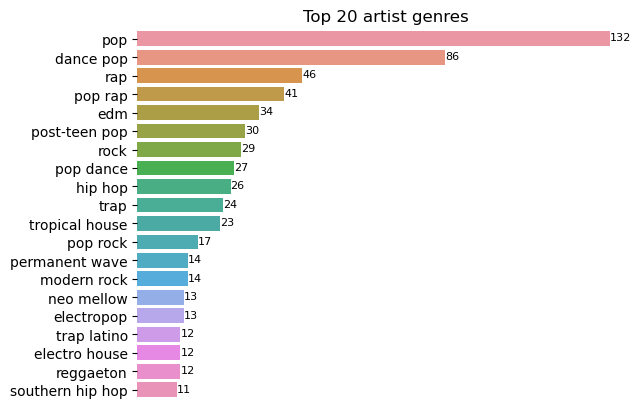

In [56]:
ax = sns.barplot(y=top_20_genres.index, x=top_20_genres)
ax.set(xlabel='Count', title='Top 20 artist genres')
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)
for genre_index, count in enumerate(top_20_genres):
    ax.text(x=count, y=genre_index + 0.1, s=count, color='black', fontsize=8)
plt.show()


- Pop is by far the most frequent - 133 artists (out of 271) have it in their list of genres.  
- Notice that there are a lot of sub-genres of pop.

## Analysis by Key and Mode

Each track has a key and mode that it's composed in (e.g. C major).

##### Are some keys used more frequently than others in popular songs?

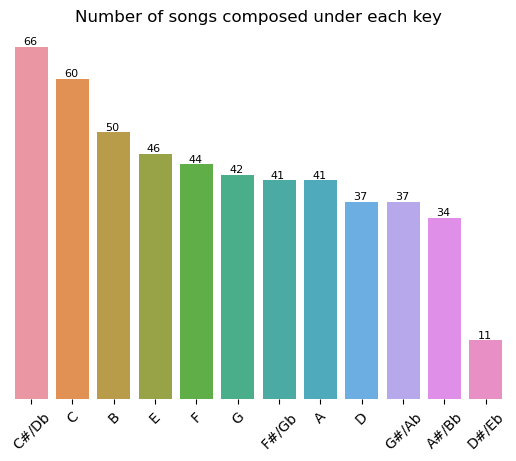

In [57]:
ax = sns.barplot(y=df['key'].value_counts(), x=df['key'].value_counts().index)
ax.set(title='Number of songs composed under each key')
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
for key_index, count in enumerate(df['key'].value_counts()):
    ax.text(x=key_index-0.2, y=count+0.5, s=count, color='black', fontsize=8)
plt.show()

- C#/Db is the most frequent key.
- D#/Eb is least used.


Some examples of songs in each key:   
- C#/Db - Shape of you, blinding lights, one dance    
- C - bohemian rhapsody, uptown funk     
- B - heat waves, dont start now    
- E - Photograph   
- G - bad guy, starboy    
- F#/Gb - dance monkey    

Key alone doesn't paint the whole picture, mode should also be considered (major/minor).

Plot the key & mode in a similar bar chart.

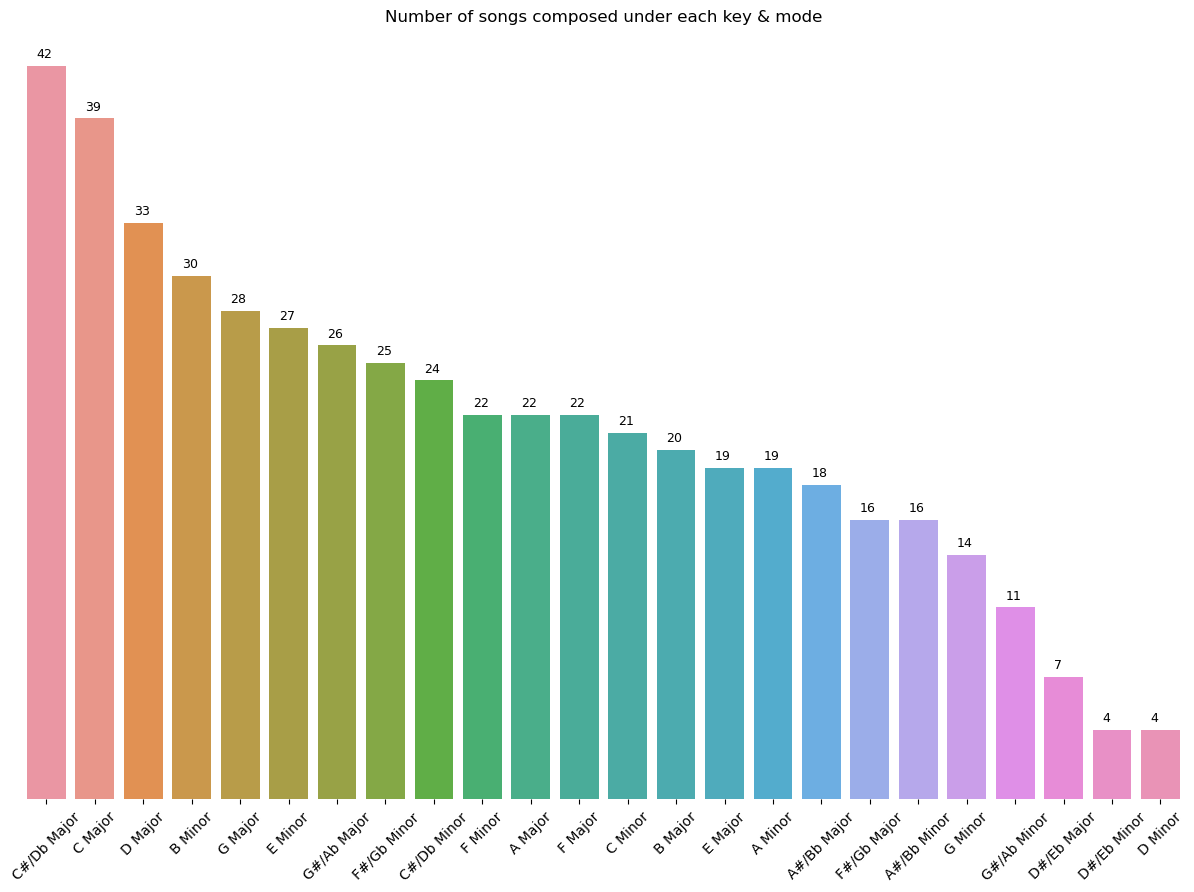

In [58]:
plt.figure(figsize=(15,10)) 
ax = sns.barplot(y=df['key_mode'].value_counts(), x=df['key_mode'].value_counts().index)
for key_index, count in enumerate(df['key_mode'].value_counts()):
    ax.text(x=key_index-0.2, y=count+0.5, s=count, color='black', fontsize=9)
plt.xticks(rotation=45)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
plt.title('Number of songs composed under each key & mode')
plt.ylabel('Count')
plt.show()

- C#/Db major is still the most popular
- Unlike previous chart, D major is the 3rd most popular
- D#/Eb Minor and D minor are very unpopular

#### Mode - What percentage of songs are major or minor?

In [59]:
round(df['mode'].value_counts()/len(df)*100)

Major    57.0
Minor    43.0
Name: mode, dtype: float64

57% of songs are in major, 43% in minor.

#### Explicit - What percentage of songs are explicit?

In [60]:
round(df['explicit'].value_counts()/len(df)*100)

False    69.0
True     31.0
Name: explicit, dtype: float64

31% are explicit, 69% are non-explicit. 

#### Time Signature - How many different time signatures are there?

In [61]:
round(df['time_signature'].value_counts()/len(df)*100)

4    95.0
3     4.0
5     1.0
1     0.0
Name: time_signature, dtype: float64

In total 4 different time signatures, with majority (95%) being 4/4.

## Analysis of Audio Features

There are many audio features of a track that are calculated by the Spotify algorithms. 

#### Is there any correlation between these features?

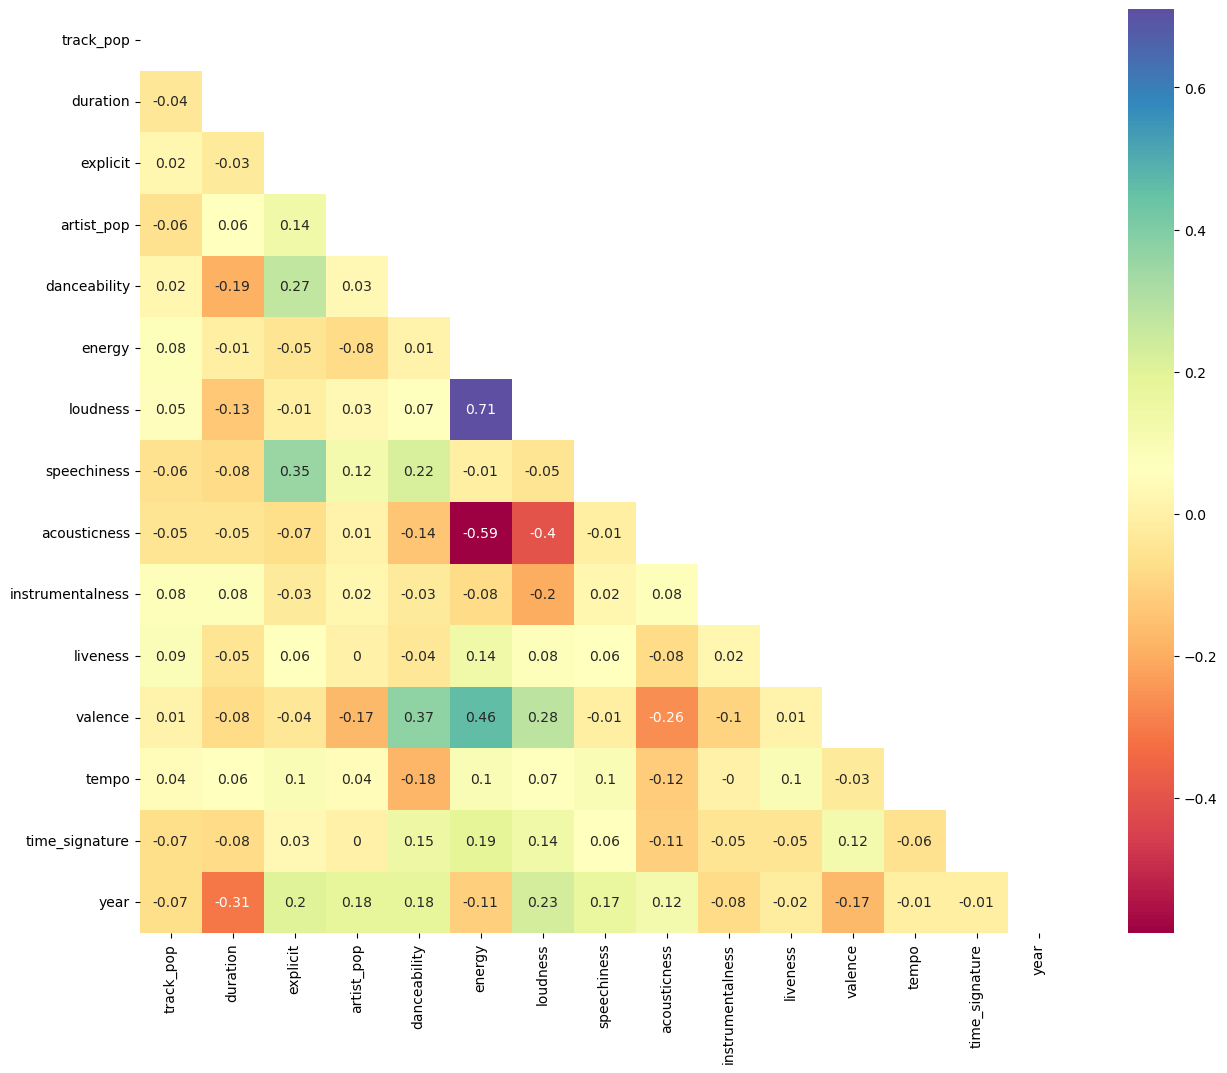

In [62]:
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12)) 
ax = sns.heatmap(corr, mask=mask, cmap='Spectral', annot=True)

#### Initial Findings
- As a song gets energetic, loudness also increases
- If a song is more acousic, energy and loudness tends to be lower
- As acousticness increases, valence decreases
- Happier sounding songs tend to be more danceable, energetic and loud

#### Looking at 'year', as time goes on:
- Duration getting shorter
- Loudness, danceability, speechiness tends to increase
- Valence tends to decrease



Quick look at a scatter plot of energy and loudness (strong +ve corr)

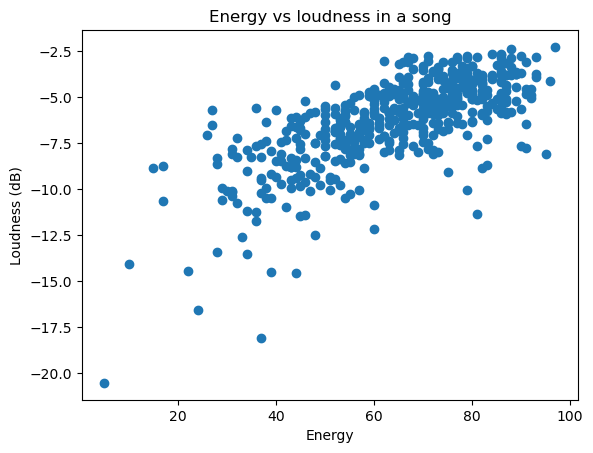

In [64]:
plt.scatter(df['energy'], df['loudness'])
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.title('Energy vs loudness in a song')
plt.show()

Scatter plot of energy and acousticness (-ve corr)

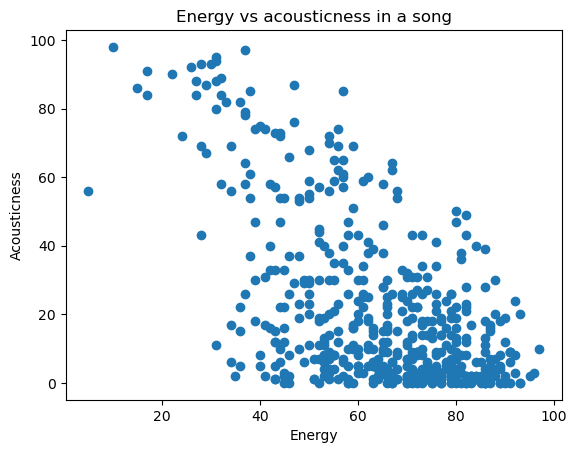

In [66]:
plt.scatter(df['energy'], df['acousticness'])
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Energy vs acousticness in a song')
plt.show()

#### Compare the distribution of each audio feature.

Here I am only including columns having values out of 100.

In [67]:
df_features = df.select_dtypes(include=['float64', bool]).drop(['tempo', 'duration', 'loudness', 'explicit'], axis=1)


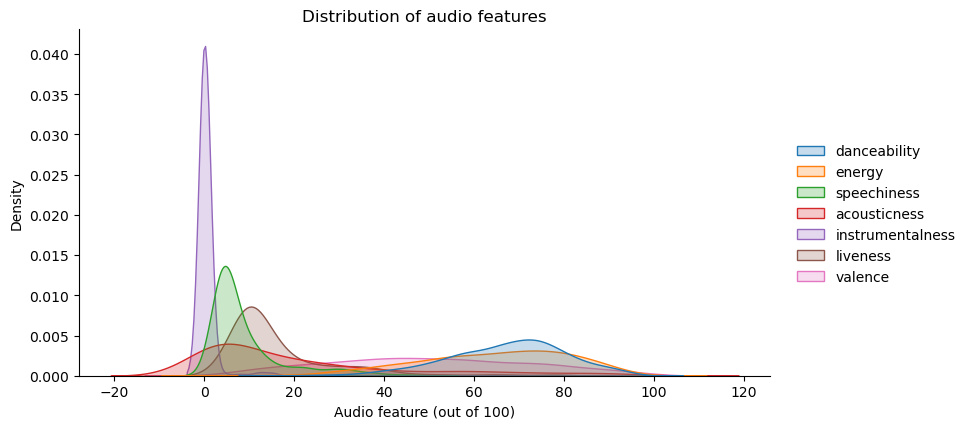

In [68]:
sns.displot(df_features, kind='kde', fill=True, height=4, aspect=2)
plt.title('Distribution of audio features')
plt.xlabel('Audio feature (out of 100)')
plt.show()

Instrumentalness has very narrow distribution around 0. Indicates most songs in the top 500 are not instrumental.

Try remove instrumentalness for better comparison of other features.

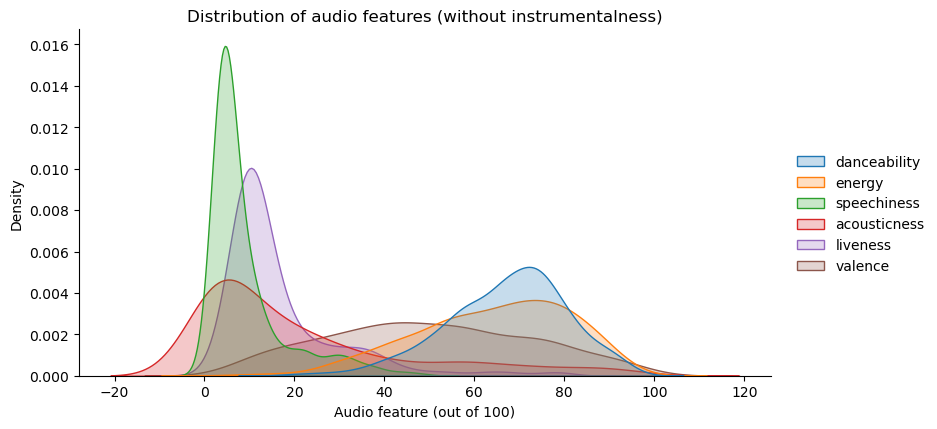

In [69]:
sns.displot(df_features.drop('instrumentalness', axis=1), kind='kde', fill=True, height=4, aspect=2)
plt.title('Distribution of audio features (without instrumentalness)')
plt.xlabel('Audio feature (out of 100)')
plt.show()

Danceability and energy has similar distribution. Tend to be higher.   
Speechiness, liveness have narrower distribution. Tend to be lower.    
Acousticness and Valence have high spread.   

#### See the same data in a boxplot 

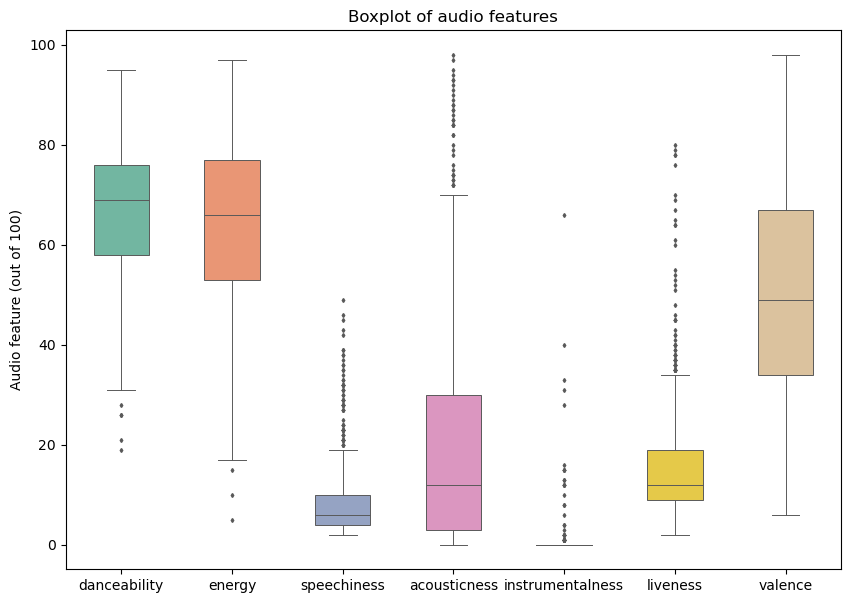

In [70]:
plt.figure(figsize=(10,7)) 
sns.boxplot(data=df_features, palette='Set2', linewidth=0.7, width=0.5, fliersize=2)
plt.title('Boxplot of audio features')
plt.ylabel('Audio feature (out of 100)')
plt.show()

On average, songs in the top 500 tend to be:
- Danceable and energetic
- Not very acoustic
- Little presence of audience
- Not instrumental
- Neutral sounding (happy/sad)

Speechiness is harder to analyse as anything between 0 - 0.66 is typical for music, with 0.33 - 0.66 having more words (e.g. rap).

### Change over the years

From the correlation matrix, there was indication that some features were changing over the years.

#### How many songs in the top 500 were released under each year?

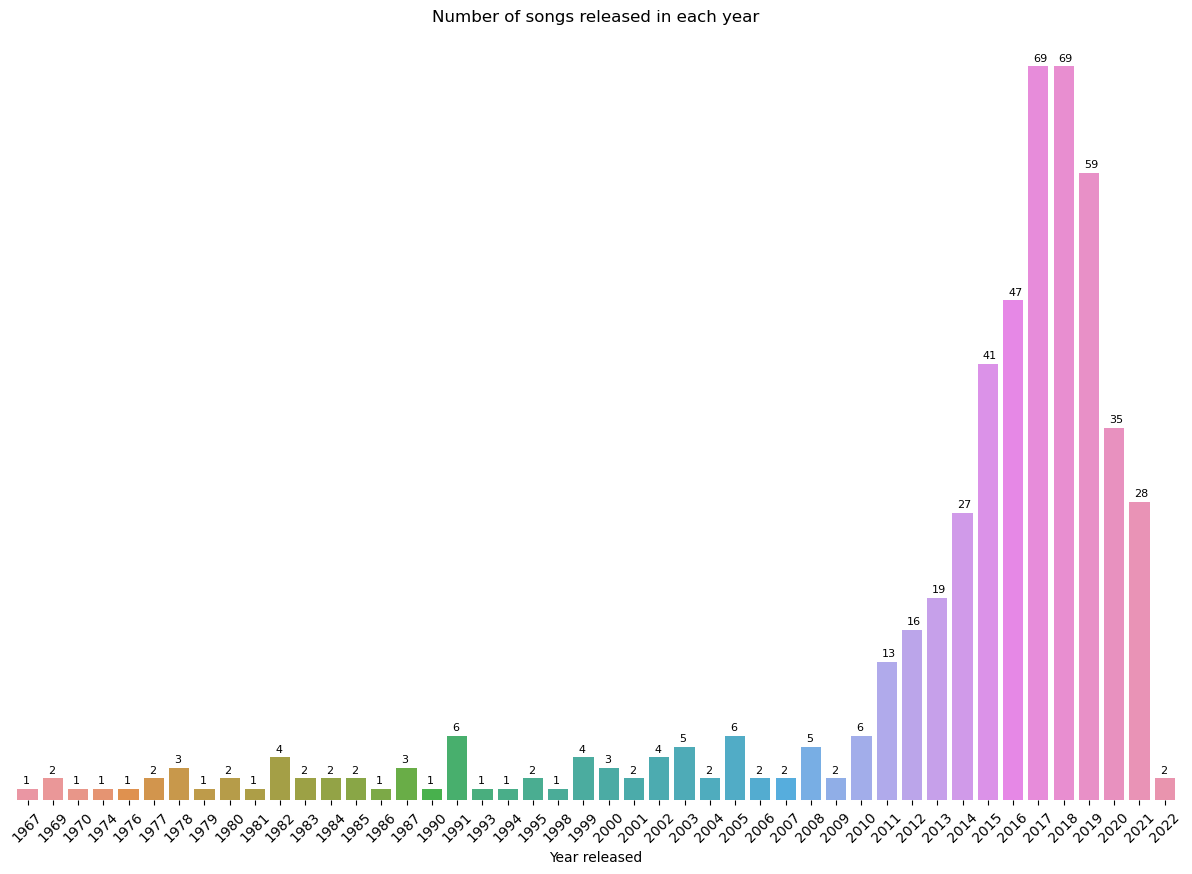

In [71]:
plt.figure(figsize=(15,10)) 
ax = sns.barplot(y=df['year'].value_counts(), x=df['year'].value_counts().index)
ax.set(xlabel='Year released', title='Number of songs released in each year')
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
for year_index, count in enumerate(df['year'].value_counts().sort_index()):
         ax.text(x=year_index-0.2, y=count+0.5, s=count, color='black', fontsize=8)
plt.show()

- Spotify was founded in 2006, taking off from ~2010
- Bias towards modern, recently released music. Makes sense as the playlist contains the **most streamed songs on spotify**.
- Less data for last few years

From the correlation matrix, it was identified that potentially:

- Duration of songs are getting shorter
- Loudness, danceability, speechiness tends to increase
- Valence tends to decrease


#### Is there a trend in audio features over time?

Here I've only included data post 2010 to exclude small sample sizes.

In [72]:
df_year = df.select_dtypes(include=['float64', bool, 'int64' ]).drop(['time_signature','tempo', 'duration', 'loudness', 'track_pop', 'artist_pop', 'explicit'], axis=1)


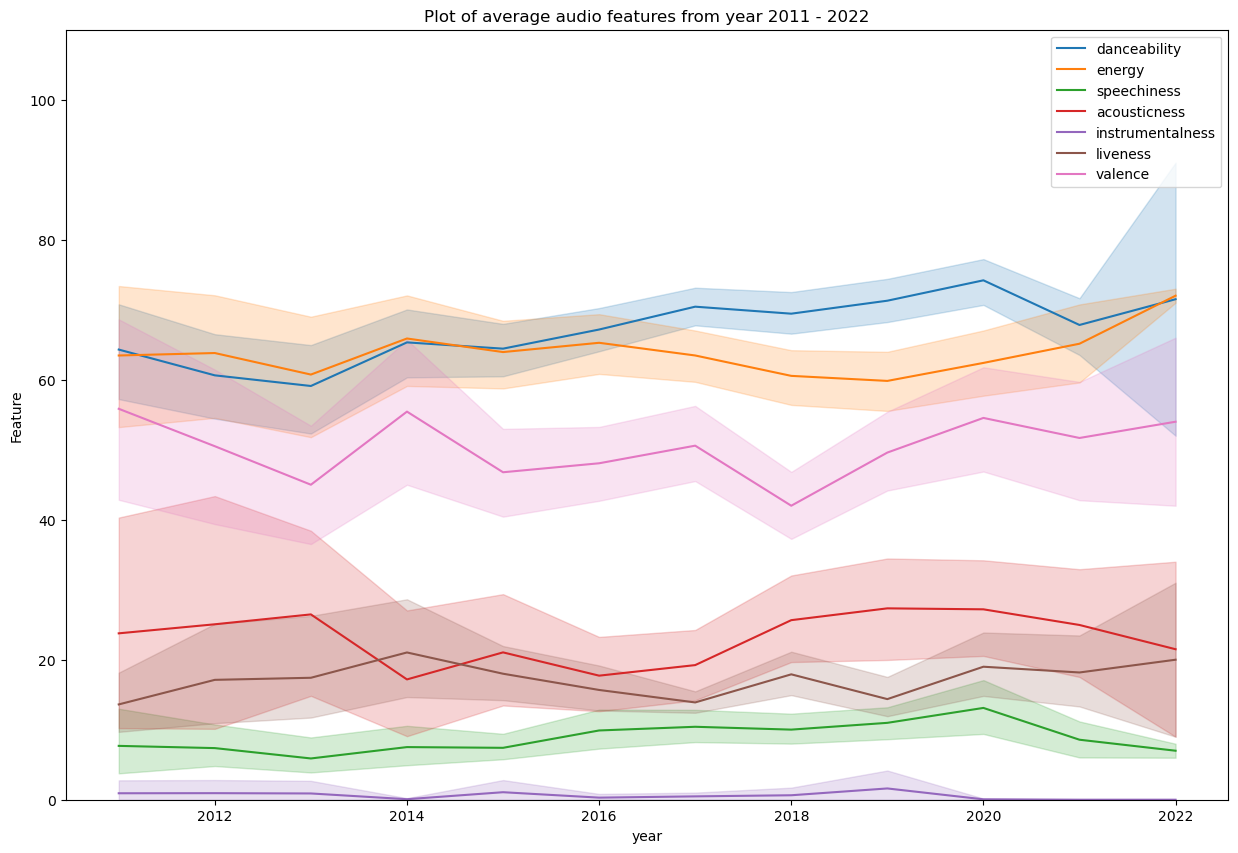

In [73]:
plt.figure(figsize=(15,10)) 
for column in df_year.columns:    
    if column != 'year':
        sns.lineplot(data=df[df['year'] > 2010], x='year', y= column, legend='brief', label=column)
        
plt.title('Plot of average audio features from year 2011 - 2022')        
plt.ylabel('Feature')
plt.legend(loc='best')
plt.ylim(0,110)
plt.show()

Can't say if there is an obvious trend from the above line plot.

Danceability potentially slightly trending up but can't conclude.

#### Is there a trend in song duration over time?

Again subset data for post 2010 and look at the average duration.

In [74]:
df_post_2010 = df[df['year'] > 2010]

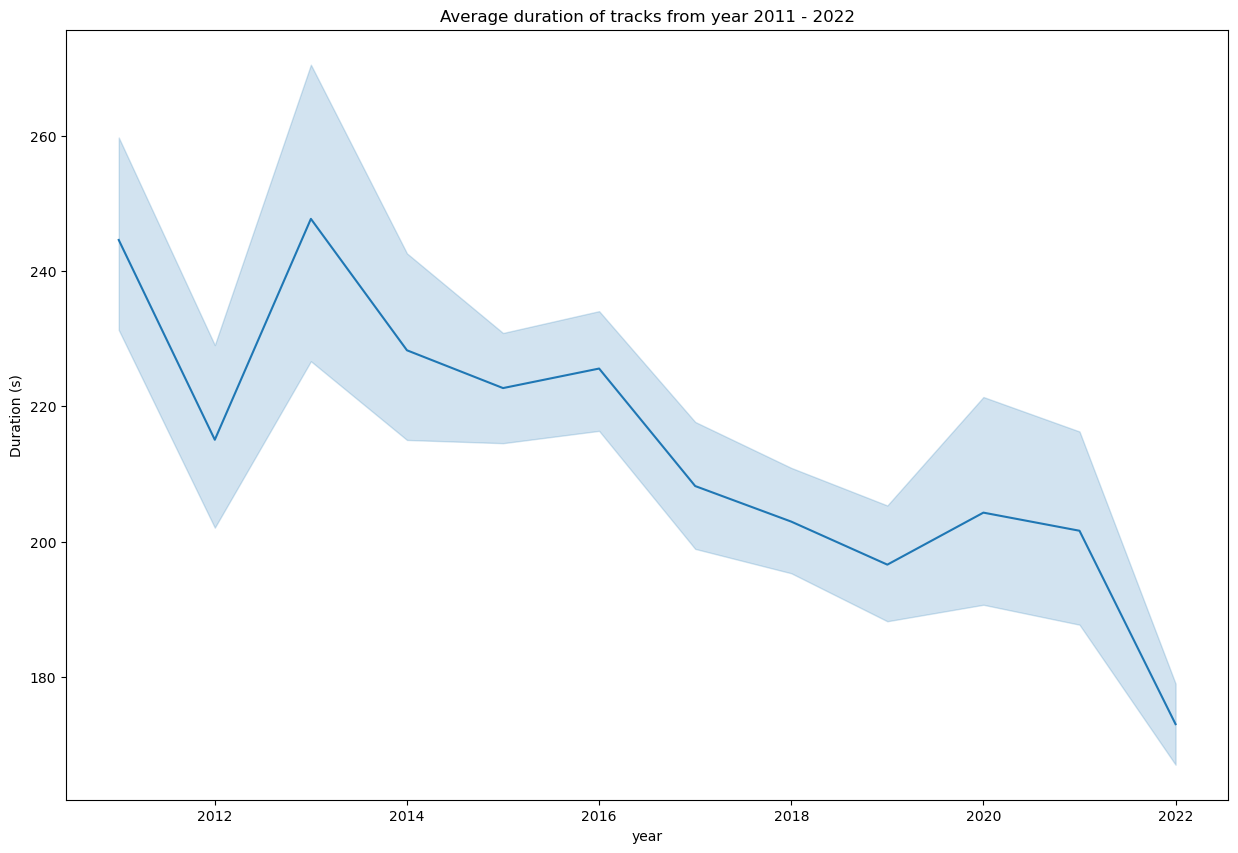

In [75]:
plt.figure(figsize=(15,10)) 
sns.lineplot(data=df[df['year'] > 2010], x='year', y= 'duration')
plt.ylabel('Duration (s)')
plt.title('Average duration of tracks from year 2011 - 2022')
plt.show()

In [76]:
round(df_post_2010.groupby('year')['duration'].mean())

year
2011    245.0
2012    215.0
2013    248.0
2014    228.0
2015    223.0
2016    226.0
2017    208.0
2018    203.0
2019    197.0
2020    204.0
2021    202.0
2022    173.0
Name: duration, dtype: float64

Duration of popular songs does appear to be trending down over the last decade, even when ignoring 2022 which only had two tracks.

Shaving off around 43 seconds from 2011 vs 2021.

### Conclusion

So to summarise, in the top 500 most streamed songs of spotify:

- **Pop** (and pop sub-genre) artists more likely to feature.
- **C#/Db major** tends to be most popular key. **D minor** is the least popular.
- Songs tend to be in **major** mode and have standard time signature (4/4).
- Average duration have been getting **shorter** over time.
- Songs tend to be more **danceable** and **energetic**.

### Notes and Improvements

This playlist a small dataset and is mostly biased towards recent music. It is affected by the founding date and popularity of spotify as a streaming platform. 

There is also biased towards western music.

- Total play count of a song not available
- Track genre isn't provided
- Some charts would have been a lot easier with tableau
- Better way to annotate plots
- Didn't draw as much insight from audio features. Rather arbitrary measures.

Could have been more interesting to aggregate playlists from each decade so there's equal weight.